In [2]:
import pandas as pd
#matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

covid_data = pd.read_csv('google_new3.csv',sep=";")


In [3]:
str_column =['iso','country','residential']
target_column = ['total_cases','fatalities'] 
predictors = list(set(list(covid_data.columns))-set(target_column)-set(str_column))
covid_data[predictors] = covid_data[predictors]
print(covid_data.columns)
covid_data.describe().transpose()

Index(['iso', 'country', 'date', 'grocery_pharmacy', 'parks', 'residential',
       'retail_recreation', 'transit_stations', 'workplaces', 'total_cases',
       'fatalities'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
date,817.0,22.000000,12.417275,1.000,11.000,22.000,33.000,43.000
grocery_pharmacy,817.0,-8.229424,21.313369,-84.798,-16.578,0.088,4.838,59.474
parks,817.0,-13.394035,32.891636,-91.456,-32.841,-6.498,6.961,75.002
residential,817.0,9.545845,10.545377,-3.647,0.744,5.912,16.695,40.343
retail_recreation,817.0,-26.205257,30.992728,-95.158,-49.975,-14.427,-0.632,19.699
transit_stations,817.0,-28.370122,30.211025,-88.956,-54.145,-19.502,-0.970,16.822
workplaces,817.0,-19.126192,25.983021,-79.293,-40.582,-8.395,1.037,21.347
total_cases,817.0,10699.773562,31656.464952,0.000,27.000,648.000,4585.000,336912.000
fatalities,817.0,566.007344,2008.520488,0.000,0.000,6.000,79.000,15887.000


In [4]:
EU_covid_data = covid_data.loc[((covid_data['country'] == 'Germany') 
                               | (covid_data['country'] == 'Spain')
                               | (covid_data['country'] == 'France')
                               | (covid_data['country'] == 'United Kingdom')
                               | (covid_data['country'] == 'Italy')
                               | (covid_data['country'] == 'Sweden'))]

AM_covid_data = covid_data.loc[((covid_data['country'] == 'Argentina')
                                | (covid_data['country'] == 'Canada')
                                | (covid_data['country'] == 'Mexico')
                                | (covid_data['country'] == 'US')
                                | (covid_data['country'] == 'Brazil'))]

AS_OC_covid_data = covid_data.loc[((covid_data['country'] == 'Indonesia')
                               | (covid_data['country'] == 'India')
                               | (covid_data['country'] == 'Japan')
                               | (covid_data['country'] == 'South Korea')
                               | (covid_data['country'] == 'Australia'))]

AF_covid_data = covid_data.loc[((covid_data['country'] == 'South Africa') 
                                | (covid_data['country'] == 'Saudi Arabia')
                                | (covid_data['country'] == 'Turkey'))]

In [5]:
X=EU_covid_data[predictors]
Y1=EU_covid_data["total_cases"]
Y2=EU_covid_data["fatalities"]


X_train, X_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.30, random_state=40)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y2, test_size=0.30, random_state=40)

In [6]:
from sklearn.svm import SVR
SVRegression=SVR(kernel = 'poly',degree=11, coef0=2)
SVRegression.fit(X_train,y1_train)

SVR(C=1.0, cache_size=200, coef0=2, degree=11, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [7]:
y_pred=SVRegression.predict(X_test)
y_pred2=SVRegression.predict(X_train)

In [8]:
print(mean_squared_error(y1_test,y_pred))
print(r2_score(y1_test,y_pred))

84191929.43021251
0.9275744109293709


In [9]:
print(mean_squared_error(y1_train,y_pred2))
print(r2_score(y1_train,y_pred2))

34363210.84461654
0.9664833744718426


In [10]:
SVRegression.fit(X2_train,y2_train)

SVR(C=1.0, cache_size=200, coef0=2, degree=11, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
y_pred=SVRegression.predict(X2_test)
y_pred2=SVRegression.predict(X2_train)

In [12]:
print(mean_squared_error(y2_test,y_pred))
print(r2_score(y2_test,y_pred))

609610.7460706687
0.9493613884153476


In [13]:
print(mean_squared_error(y2_train,y_pred2))
print(r2_score(y2_train,y_pred2))

19479.853759671263
0.997925544399753


In [20]:
test2_regr = ['date']


SVRegression1=SVR(kernel = 'poly',degree=11, coef0=2)
SVRegression1.fit(EU_covid_data[test2_regr],EU_covid_data["total_cases"])

SVRegression2=SVR(kernel = 'poly',degree=11, coef0=2)
SVRegression2.fit(EU_covid_data[test2_regr],EU_covid_data["fatalities"])

SVR(C=1.0, cache_size=200, coef0=2, degree=11, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

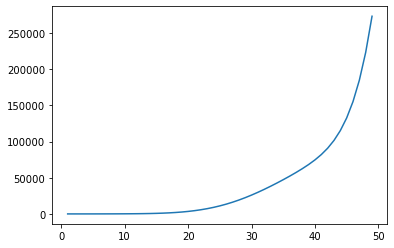

In [29]:
import numpy as np

b=np.arange(1,50)
a=np.arange(1,50)

for i in range(49):
    b[i]=SVRegression1.predict([[a[i]]])[0]
    
plt.plot(a,b)

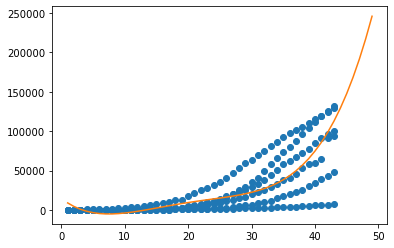

In [33]:
from scipy.interpolate import *

poly = np.poly1d(np.polyfit(a,b,4))
y = poly(a)

plt.plot(EU_covid_data["date"], EU_covid_data["total_cases"], "o", a, y)

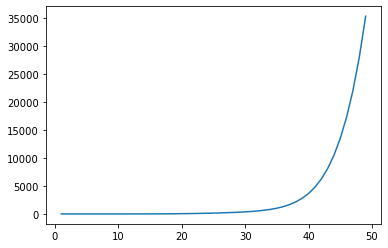

In [36]:
b=np.arange(1,50)
a=np.arange(1,50)

for i in range(49):
    b[i]=SVRegression2.predict([[a[i]]])[0]
    
plt.plot(a,b)

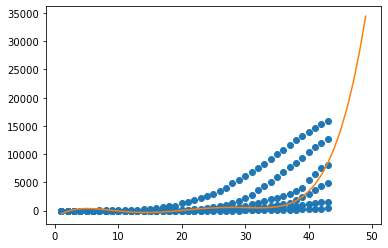

In [37]:
poly = np.poly1d(np.polyfit(a,b,5))
y = poly(a)

plt.plot(EU_covid_data["date"], EU_covid_data["fatalities"], "o", a, y)